Task
There is a single-digit seven segment display. The display has a problem: there can be from 0 to 7 (all) "reversed" segments. A reversed segment is on when it should be off, and off when it should be on.

The display shows numbers from 0 to 9 (inclusive). If there are reversed segments, numbers may look stran

How numbers appear on a correctly working display:       0-5 with top segment reversed:
  _         _    _         _    _    _    _    _                _              _
 | |    |   _|   _|  |_|  |_   |_     |  |_|  |_|         | |    |   _|   _|  |_|  |_
 |_|    |  |_    _|    |   _|  |_|    |  |_|   _|         |_|    |  |_    _|    |  

 Given some numbers as they appear on display, try to determine which segments are reversed. _|ge.

Segment names
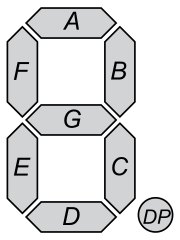
Note: in this kata segment names are lowercase, "dp" is not used.


Input
⬬ display [list of strings]
Each element of the list is a 11-chars string that represents a number shown on display. Format: (3 rows, 3 chars per row) a fgb edc (the 1st and 3rd chars of the first row are always spaces). Each segment is represented by a char:

off: space (' ')
on: '_' (a,d,g) or '|' (b,c,e,f)

Examples:
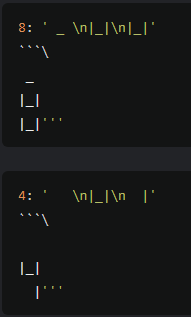

All inputs are valid; there is always at least one string.

Output
[string] or None
If the set of reversed segments can be determined:

a lowercase string containing the names of reversed segments in alphabetical order (e.g. '', 'a', 'ceg', 'abcdefg');
otherwise:

None
Examples
       _ 
 |_|  | |
 |_     |
Input: ['   \n|_|\n|_ ', ' _ \n| |\n  |']
Output: None (it could be 2,1 with a,f reversed, or 1,2 with c,d,e,f,g reversed)

  _    _
 |_|  |    | | 
 |_|  |_|    | 
Input: [' _ \n|_|\n|_|', ' _ \n|  \n|_|', '   \n| |\n  |']
Output: 'g' (0,6,4 with g reversed, no other options)

In [ ]:
seg_names = ' a \nfgb\nedc'
d_templates = [
    ' _ \n| |\n|_|',
    '   \n  |\n  |',
    ' _ \n _|\n|_ ',
    ' _ \n _|\n _|',
    '   \n|_|\n  |',
    ' _ \n|_ \n _|',
    ' _ \n|_ \n|_|',
    ' _ \n  |\n  |',
    ' _ \n|_|\n|_|',
    ' _ \n|_|\n _|',
]

def check_digit(d_str: str)->bool:
    return d_str in d_templates

def get_variants(templ: str)->list:
    res = []
    for elem in d_templates:
        res.append(''.join(sorted([val for ind, val in enumerate(seg_names) if templ[ind] != elem[ind]])))
    return res

def invert_sections(d_string: str, variant: str)->str:
    for ch in variant:
        ind = seg_names.index(ch)
        if d_string[ind] in ['_','|']:
            d_string = d_string[:ind] + ' ' + d_string[ind + 1:]
        else:
            d_string = d_string[:ind] + '_' + d_string[ind + 1:] if ch in ['a','d','g'] else d_string[:ind] + '|' + d_string[ind + 1:]
    return d_string

def reversed_segments(display: str)->str | None:
    if len(display) < 2:
        return None
    variants = get_variants(display.pop(0))
    for elem in display:
        variants = [el for el in variants if check_digit(invert_sections(elem, el))]
    return variants[0] if len(variants) == 1 else None